In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
%matplotlib inline

plt.style.use('fivethirtyeight')

# Gathering our data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)

# df.head()


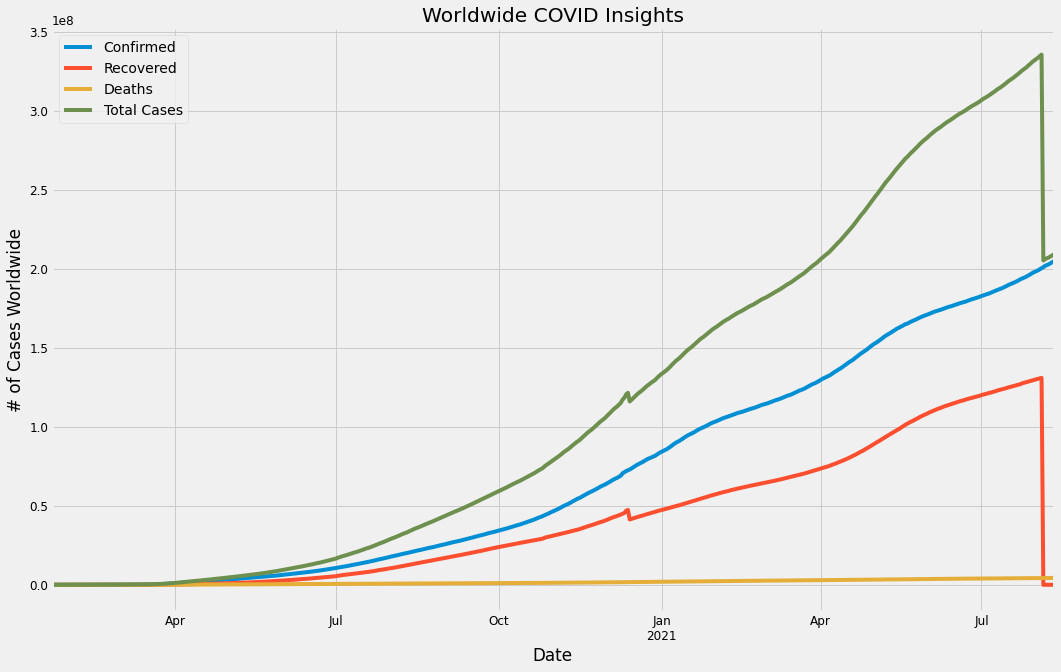

In [516]:
### Worldwide COVID insight - Time Series, Multiple, Comparison
worldwide_df = df.groupby(['Date']).sum()
# worldwide_df.head()
w = worldwide_df.plot(figsize = (16, 10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

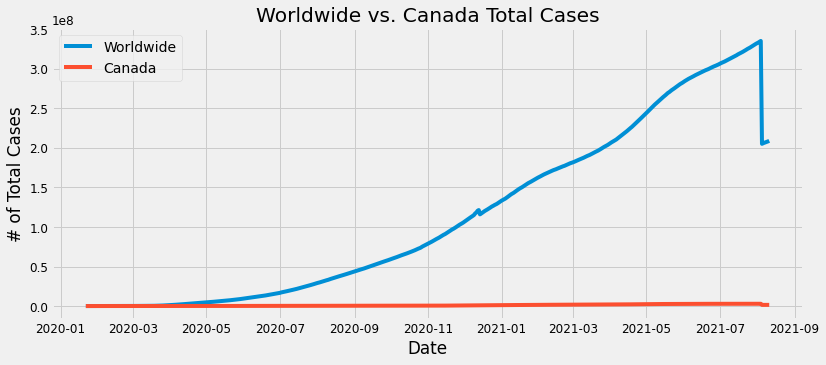

In [517]:
### Canada vs. Worldwide Cases - Time series, Comparison

canada_df = df[df['Country'] == 'Canada'].groupby(['Date']).sum()
# congo_df = df[df['Country'] == 'Congo (Brazzaville)'].groupby(['Date']).sum()

fig_canada = plt.figure(figsize = (12, 5))
# fig_congo = plt.figure(figsize = (12, 15))

ax = fig_canada.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(canada_df[['Total Cases']], label = 'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

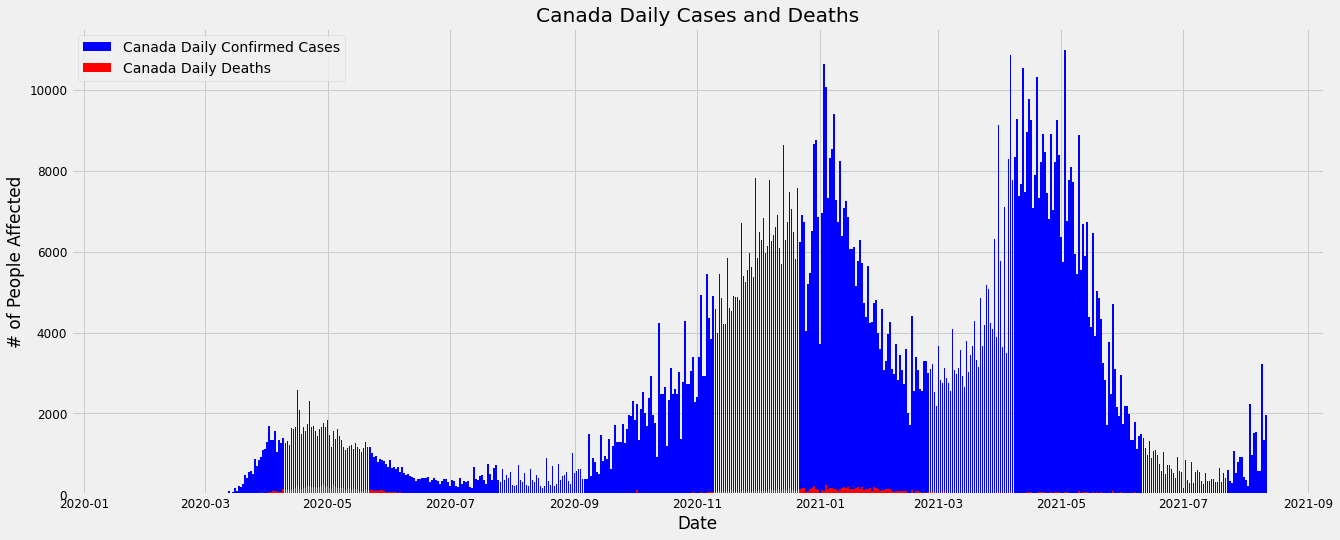

In [518]:
### Canada Daily Cases and Deaths - Histogram

canada_df = canada_df.reset_index()
canada_df['Daily Confirmed'] = canada_df['Confirmed'].sub(canada_df['Confirmed'].shift())
canada_df['Daily Deaths'] = canada_df['Deaths'].sub(canada_df['Deaths'].shift())

fig_canada = plt.figure(figsize = (20, 8))
ax = fig_canada.add_subplot(111)

ax.bar(canada_df['Date'], canada_df['Daily Confirmed'], color = 'b', label = 'Canada Daily Confirmed Cases')
ax.bar(canada_df['Date'], canada_df['Daily Deaths'], color = 'r', label = 'Canada Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc = 'upper left')
plt.show()

In [519]:
### Canada COVID-19 Infection rates per month - Heatmap

# Read file and separate needed data subset
covid_all_countries = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', 
                                  usecols = [0, 1, 2], index_col = 0, parse_dates=[0])

In [520]:
#Filtering data for Canadian values only
covid_canada_confirmed = covid_all_countries.loc[covid_all_countries['Country']=='Canada']

In [521]:
# create a copy of the dataframe, and add columns for month and year
canada_heatmap = covid_canada_confirmed.copy()
canada_heatmap.drop(columns='Country', inplace=True)
canada_heatmap['month'] = canada_heatmap.index.month
canada_heatmap['year'] = canada_heatmap.index.year
# group by month and year, get the average
canada_heatmap = canada_heatmap.groupby(['month', 'year']).mean()
canada_heatmap = canada_heatmap.unstack(level=0)

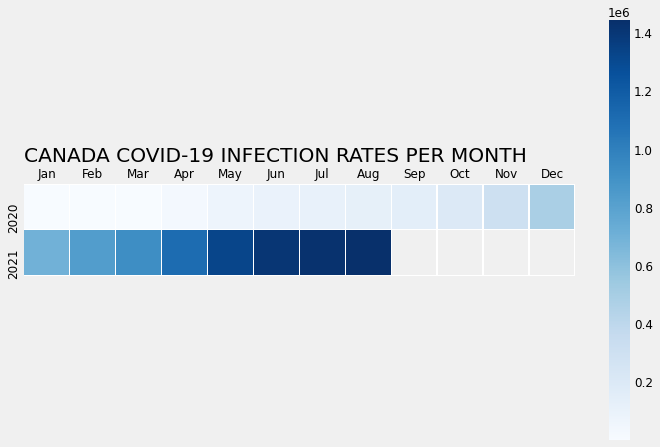

In [522]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(canada_heatmap, cmap="Blues", square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'Canada COVID-19 Infection rates per month'.upper()
plt.title(title, loc='left')
plt.show()

In [523]:
### Canada COVID-19 Infection rate - Time series analysis and Forecasting, Advanced
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [524]:
#Read file and separate needed dataset
worldwide_df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=[0])
canada_df = worldwide_df.loc[worldwide_df['Country'] == 'Canada']
canada_df['Date'].min(), canada_df['Date'].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2021-08-11 00:00:00'))

In [525]:
#Data preprocessing 

#Removing unneeded columns, check missing values, aggreggate cases by date,
                                                # convert 'date' column to datetimes 
cols = ['Recovered', 'Deaths']
canada_df.drop(cols, axis=1, inplace=True)
canada_df = canada_df.sort_values('Date')
canada_df.isnull().sum()

Date         0
Country      0
Confirmed    0
dtype: int64

In [526]:
canada_df = canada_df.groupby('Date')['Confirmed'].sum().reset_index()
canada_df.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,1


In [527]:
#Indexing with Time Series data
canada_df = canada_df.set_index('Date')
canada_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', name='Date', length=568, freq=None)

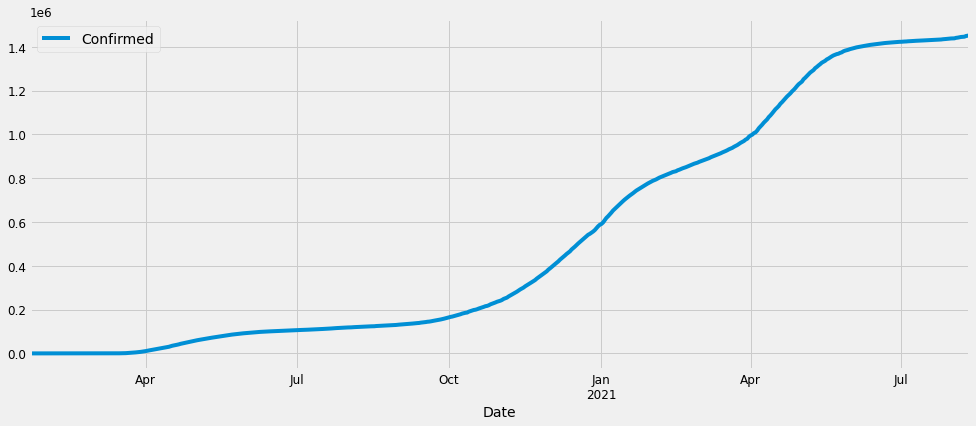

In [528]:
canada_df.plot(figsize=(15, 6))
plt.show()

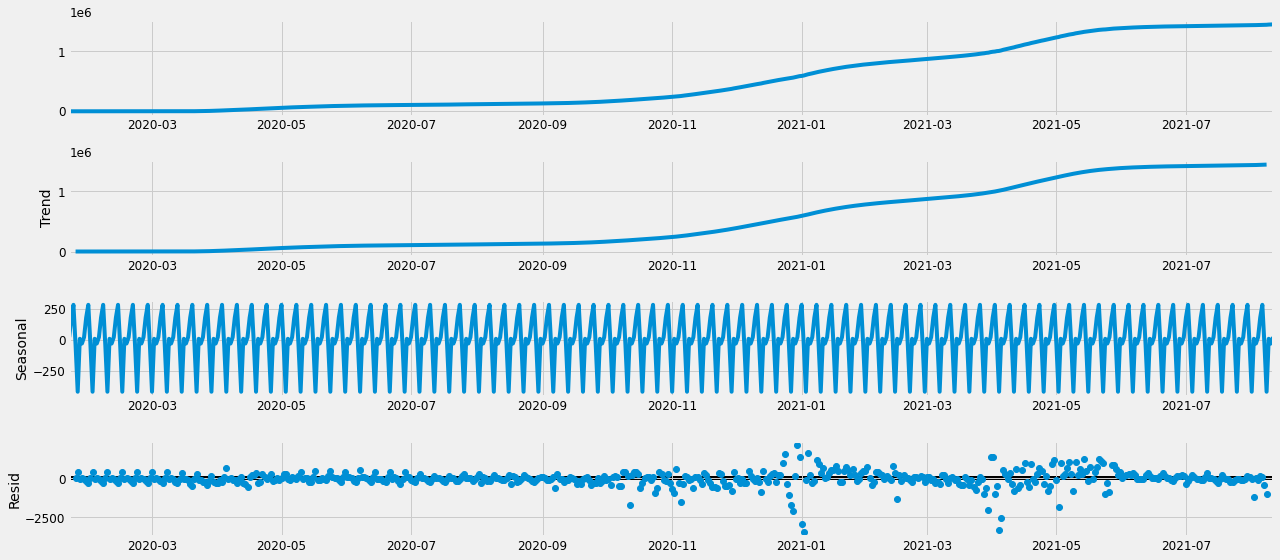

In [529]:
# Time series decomposition - 1) Trend, 2) Seasonality, 3) Noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(canada_df, model='additive')
fig = decomposition.plot()
plt.show()

In [530]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [531]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:600.469284030206
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:604.4475016387296
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:252.17221149784413
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:249.32545218280342
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:606.3625490420131
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:604.3671742066786
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:382.04333666016305
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:250.55938490730804
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:593.1137416081978
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:595.0999086412596
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:245.6750613184501
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:247.56692452019502
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:595.0998882698985
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:597.0998933459747
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:247.26232715561193
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:249.26227111672165
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:495.5458689964168
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:497.7421403552519
ARIM

In [532]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5385      0.292      1.844      0.065      -0.034       1.111
ma.L1          1.0029      1.386      0.724      0.469      -1.713       3.719
ar.S.L12       0.9997      0.303      3.299      0.001       0.406       1.594
sigma2      1.112e+09   1.53e-09   7.27e+17      0.000    1.11e+09    1.11e+09


In [533]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>